In [377]:
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium 
import geocoder

In [378]:
#MOJ ACCOUNT

CLIENT_ID = 'LUH5C5M1TQVF0CO5HDOYL2OUJZNIYT5OTJJN5ODADB2MZSHH' # Foursquare ID
CLIENT_SECRET = '0NKLQCRXL4R4P2BCA5RNQ0TOXNBX0ETXGWCFE1I453V453DX' # Foursquare Secret
VERSION = '20210106' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
limit=100

# Make an empty map
map_Center = folium.Map(location=[41.996104045108254,21.431439469129984], zoom_start=13)

Your credentails:
CLIENT_ID: LUH5C5M1TQVF0CO5HDOYL2OUJZNIYT5OTJJN5ODADB2MZSHH
CLIENT_SECRET:0NKLQCRXL4R4P2BCA5RNQ0TOXNBX0ETXGWCFE1I453V453DX


In [379]:
#url = 'https://api.foursquare.com/v2/venues/explore?query:restorant&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(

def get_venues(lat,lng,radius):
    
    url = 'https://api.foursquare.com/v2/venues/explore?query:restorant&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit,
            )



    results = requests.get(url).json()["response"]['groups'][0]['items']

    venues_list=[]
    total_venues=[]



    for item in results:
        venues_list=[]
        name=item['venue']['name'] 
        lat=item['venue']['location']['lat'] 
        lng=item['venue']['location']['lng']
        tip=item['venue']['categories'][0]['name']
        venues_list.append(name)
        venues_list.append(lat)
        venues_list.append(lng)
        venues_list.append(tip)
        total_venues.append(venues_list)

        df_total=pd.DataFrame(total_venues, columns=['name', 'lat', 'lng','categories'])


        df_total.append(df_total)
    
        df_total_Restaurants = df_total.loc[ \
                                    (df_total['categories'] == 'Restaurant') \
                                    |(df_total['categories'] == 'Eastern European Restaurant') \
                                    |(df_total['categories'] == 'Modern European Restaurant') \
                                    |(df_total['categories'] == 'Comfort Food Restaurant') \
                                    |(df_total['categories'] == 'Mexican Restaurant') \
                                    |(df_total['categories'] == 'Italian Restaurant') \
                                    |(df_total['categories'] == 'Sushi Restaurant') \
                                    |(df_total['categories'] == 'Seafood Restaurant')\
                                    |(df_total['categories'] == 'Vegetarian / Vegan Restaurant')\
                                    |(df_total['categories'] == 'Chinese Restaurant')\
                                    |(df_total['categories'] == 'French Restaurant')\
                                    |(df_total['categories'] == 'Cafeteria')\
                                    |(df_total['categories'] == 'Cuban Restaurant')\
                                    |(df_total['categories'] == 'Dessert Shop')\
                                    |(df_total['categories'] == 'Irish Pub')\
                                    |(df_total['categories'] == 'Latin American Restaurant')\
                                    |(df_total['categories'] == 'Fast Food Restaurant')\
                                    |(df_total['categories'] == 'Turkish Restaurant')\
                                    |(df_total['categories'] == 'Mediterranean Restaurant')\
                                    |(df_total['categories'] == 'Indian Restaurant')\
                                    |(df_total['categories'] == 'Pizza Place') \
                                    |(df_total['categories'] == 'Fish & Chips Shop')\
                                    |(df_total['categories'] == 'BBQ Joint') \
                                    |(df_total['categories'] == 'Lounge') \
                                    |(df_total['categories'] == 'Bistro') \
                                    |(df_total['categories'] == 'Gastropub') \
                                    |(df_total['categories'] == 'Bakery')\
                                    |(df_total['categories'] == 'Café')\
                                    |(df_total['categories'] == 'Coffee Shop')\
                                    |(df_total['categories'] == 'Salad Place')\
                                    |(df_total['categories'] == 'Diner')
 
                                    
                                    
                                  ]

    return df_total_Restaurants

## NEIGHBORHOOD / AREA "CENTAR" ... THIS IS 1th AREA FOR ANALYSIS

In [380]:
df_Sk_area=pd.read_csv("SKOPJE LOKACII.csv")
#print(df_Sk_area)

print("latitude & longitude FOR NEIGHBORHOOD / AREA 'CENTAR' ARE:")

lat=df_Sk_area.iat[0, 1]
lng=df_Sk_area.iat[0, 2]
radius=df_Sk_area.iat[0, 4]

print("latitude is", lat)
print("longitude is", lng)
print("radius of interest is around:" , radius, "meters")

df_total_Restaurants=get_venues(lat,lng,radius)
df_total_Restaurants

latitude & longitude FOR NEIGHBORHOOD / AREA 'CENTAR' ARE:
latitude is 41.996104045108254
longitude is 21.431439469129984
radius of interest is around: 2000 meters


,name,lat,lng,categories
0,Executive Lounge of Skopje Marriott Hotel,41.996092,21.430597,Lounge
3,Пелистер / Pelister,41.995487,21.431384,Restaurant
4,O là là,41.995361,21.433748,Dessert Shop
5,Горки,41.996411,21.427940,Café
6,Senigallia,41.995947,21.434383,Italian Restaurant
9,La Terrazza,41.995288,21.431934,Italian Restaurant
10,Amigos Cantina,41.993294,21.430254,Mexican Restaurant
12,Distrikt,41.996308,21.430672,Restaurant
14,Бакал,41.994498,21.432881,Bakery
18,Gino,41.994338,21.434200,Italian Restaurant


In [381]:
df_categories= df_total_Restaurants.groupby(['categories']).count()
df_categories.drop(['lat','lng'], axis=1,inplace = True)
df_categories.rename(columns = {'name':'number_of_objects'}, inplace = True)
print(df_categories)

                             number_of_objects
categories                                    
BBQ Joint                                    1
Bakery                                       4
Bistro                                       1
Café                                        11
Chinese Restaurant                           1
Coffee Shop                                  2
Dessert Shop                                 2
Diner                                        2
Eastern European Restaurant                  1
French Restaurant                            1
Gastropub                                    2
Italian Restaurant                           3
Latin American Restaurant                    1
Lounge                                       2
Mexican Restaurant                           1
Modern European Restaurant                   1
Pizza Place                                  2
Restaurant                                   7
Sushi Restaurant                             1
Turkish Resta

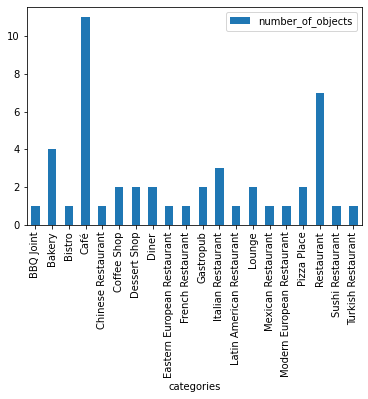

In [382]:
ax = df_categories.plot.bar()

<b>ADD VENUES TO MAP<b>

In [383]:
                      
for i in range(0,len(df_total_Restaurants)):
    
    folium.Marker([df_total_Restaurants.iloc[i]['lat'], df_total_Restaurants.iloc[i]['lng']], popup=df_total_Restaurants.iloc[i]['name'],icon=folium.Icon(color='red')).add_to(map_Center)


## NEIGHBORHOOD / AREA "KARPOS" ...  THIS IS 2nd AREA FOR ANALYSIS

In [384]:
print("latitude & longitude FOR NEIGHBORHOOD / AREA 'KARPOS' ARE:")

lat=df_Sk_area.iat[1, 1]
lng=df_Sk_area.iat[1, 2]
radius=df_Sk_area.iat[1, 4]

print("latitude is", lat)
print("longitude is", lng)
print("radius of interest is around:" , radius, "meters")

df_total_Restaurants=get_venues(lat,lng,radius)
df_total_Restaurants

latitude & longitude FOR NEIGHBORHOOD / AREA 'KARPOS' ARE:
latitude is 42.005068829172394
longitude is 21.391412318562146
radius of interest is around: 2000 meters


,name,lat,lng,categories
1,Veneto,42.003903,21.392323,Italian Restaurant
9,Скара Бар,42.001671,21.392357,BBQ Joint
10,Ch2pter,42.004705,21.390654,Lounge
13,Енрико,42.003116,21.399441,Pizza Place
16,Forza Café & Restaurant,41.999655,21.390962,Café
18,Olive,42.001480,21.401268,Italian Restaurant
22,КафеСтудио 7Гр.,42.002984,21.398973,Coffee Shop
23,Кај Чичо 2,42.009023,21.385669,Mediterranean Restaurant
24,Krem Caffe ★,42.004706,21.393720,Coffee Shop
26,Play Caffe,42.003890,21.392382,Café


In [385]:
df_categories= df_total_Restaurants.groupby(['categories']).count()
df_categories.drop(['lat','lng'], axis=1,inplace = True)
df_categories.rename(columns = {'name':'number_of_objects'}, inplace = True)
df_categories

,number_of_objects
categories,
BBQ Joint,5
Bakery,2
Café,8
Coffee Shop,3
Comfort Food Restaurant,1
Dessert Shop,3
Diner,1
Eastern European Restaurant,2
Fish & Chips Shop,3


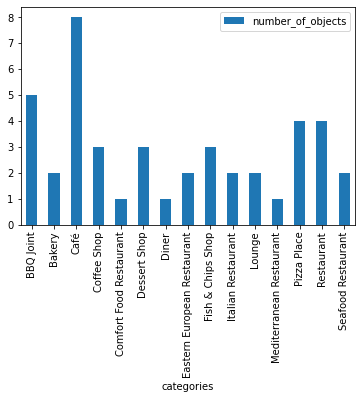

In [386]:
ax = df_categories.plot.bar()

<b>ADD VENUES TO MAP<b>

In [387]:
                      
for i in range(0,len(df_total_Restaurants)):
    
    folium.Marker([df_total_Restaurants.iloc[i]['lat'], df_total_Restaurants.iloc[i]['lng']], popup=df_total_Restaurants.iloc[i]['name'], icon=folium.Icon(color='blue')).add_to(map_Center)


## NEIGHBORHOOD / AREA "AERODROM" ... THIS IS 3rd AREA FOR ANALYSIS


In [388]:
df_Sk_area=pd.read_csv("SKOPJE LOKACII.csv")
#print(df_Sk_area)

print("latitude & longitude FOR NEIGHBORHOOD / AREA 'AERODROM' ARE:")

lat=df_Sk_area.iat[2, 1]
lng=df_Sk_area.iat[2, 2]
radius=df_Sk_area.iat[2, 4]

print("latitude is", lat)
print("longitude is", lng)
print("radius of interest is around:" , radius, "meters")

df_total_Restaurants=get_venues(lat,lng,radius)
df_total_Restaurants

latitude & longitude FOR NEIGHBORHOOD / AREA 'AERODROM' ARE:
latitude is 41.986502521747006
longitude is 21.466283676601922
radius of interest is around: 2000 meters


,name,lat,lng,categories
4,Deja Vu (Capitol Mall),41.985841,21.466124,Italian Restaurant
9,Сендвичара 7-ца (Аеродром),41.989378,21.459498,Fast Food Restaurant
14,Pastrmajlija & Grill House,41.986767,21.465098,BBQ Joint
17,Equilibrium Restaurant & Coffee Bar,41.986579,21.454279,Modern European Restaurant
19,La Strega Espresso Bar,41.988382,21.454634,Coffee Shop
20,Every Day Coffee Shop,41.989492,21.475901,Café
24,Слаткарница „Палма“ (Аеродром),41.988622,21.453096,Dessert Shop
27,БАР ОН,41.984927,21.465312,Café
28,Big Fish,41.989719,21.459630,Restaurant
30,Ap Ap Lap,41.983679,21.464519,Restaurant


In [389]:
df_categories= df_total_Restaurants.groupby(['categories']).count()
df_categories.drop(['lat','lng'], axis=1,inplace = True)
df_categories.rename(columns = {'name':'number_of_objects'}, inplace = True)
df_categories

,number_of_objects
categories,
BBQ Joint,4
Bakery,5
Café,5
Coffee Shop,1
Comfort Food Restaurant,1
Dessert Shop,3
Eastern European Restaurant,1
Fast Food Restaurant,2
Gastropub,1


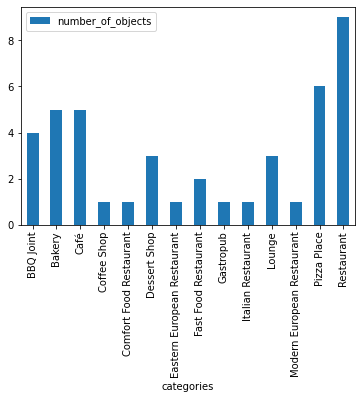

In [390]:
ax = df_categories.plot.bar()

<b>ADD VENUES TO MAP<b>

In [391]:
                      
for i in range(0,len(df_total_Restaurants)):
    
    
    folium.Marker([df_total_Restaurants.iloc[i]['lat'], df_total_Restaurants.iloc[i]['lng']], popup=df_total_Restaurants.iloc[i]['name'],icon=folium.Icon(color='green')).add_to(map_Center)


## NEIGHBORHOOD / AREA "GAZI BABA" ...  THIS IS 4th AREA FOR ANALYSIS

In [392]:
df_Sk_area=pd.read_csv("SKOPJE LOKACII.csv")
print("latitude & longitude FOR NEIGHBORHOOD / AREA 'GAZI BABA' ARE:")

lat=df_Sk_area.iat[3, 1]
lng=df_Sk_area.iat[3, 2]
radius=df_Sk_area.iat[3, 4]

print("latitude is", lat)
print("longitude is", lng)
print("radius of interest is around:" , radius, "meters")

df_total_Restaurants=get_venues(lat,lng,radius)
df_total_Restaurants

latitude & longitude FOR NEIGHBORHOOD / AREA 'GAZI BABA' ARE:
latitude is 42.00132544607287
longitude is 21.49659349769537
radius of interest is around: 1750 meters


,name,lat,lng,categories
0,Пекара Ден/Дезо,41.998817,21.495692,Bakery
1,The Hunters Lodge Kamnik,42.007225,21.487254,Restaurant
2,Вели Ив / Veli Iv,42.004362,21.504896,Restaurant
3,Slatkarnica Sharlota,42.002012,21.492110,Dessert Shop
4,Gostilnica Jato 90,42.001506,21.499063,BBQ Joint
5,Caffe Kremisimo,41.995178,21.509927,Café
11,Velchevo Meanche,42.001131,21.496126,Restaurant
12,Кај баба и дедо,41.999077,21.494743,Eastern European Restaurant
17,Meze bar Raj,42.000521,21.489163,Comfort Food Restaurant
21,Picerija Virdzina,41.995635,21.500621,Restaurant


In [393]:
df_categories= df_total_Restaurants.groupby(['categories']).count()
df_categories.drop(['lat','lng'], axis=1,inplace = True)
df_categories.rename(columns = {'name':'number_of_objects'}, inplace = True)
df_categories

,number_of_objects
categories,
BBQ Joint,1
Bakery,1
Café,1
Comfort Food Restaurant,1
Dessert Shop,1
Eastern European Restaurant,1
Fast Food Restaurant,2
Restaurant,8


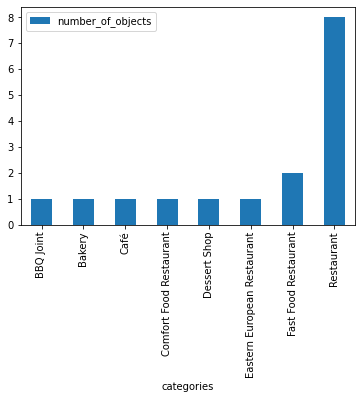

In [394]:
ax = df_categories.plot.bar()

In [395]:
                      
for i in range(0,len(df_total_Restaurants)):
    
    folium.Marker([df_total_Restaurants.iloc[i]['lat'], df_total_Restaurants.iloc[i]['lng']], popup=df_total_Restaurants.iloc[i]['name'], icon=folium.Icon(color='orange')).add_to(map_Center)


## NEIGHBORHOOD / AREA "BUTEL" ...  THIS IS 5th AREA FOR ANALYSIS

In [396]:
df_Sk_area=pd.read_csv("SKOPJE LOKACII.csv")
#print(df_Sk_area)

print("latitude & longitude FOR NEIGHBORHOOD / AREA 'BUTEL' ARE:")

lat=df_Sk_area.iat[4, 1]
lng=df_Sk_area.iat[4, 2]
radius=df_Sk_area.iat[4, 4]

print("latitude is", lat)
print("longitude is", lng)
print("radius of interest is around:" , radius, "meters")

df_total_Restaurants=get_venues(lat,lng,radius)
df_total_Restaurants

latitude & longitude FOR NEIGHBORHOOD / AREA 'BUTEL' ARE:
latitude is 42.03210781069088
longitude is 21.444302916489363
radius of interest is around: 3000 meters


,name,lat,lng,categories
0,Bajka Lounge Bar,42.030797,21.444362,Lounge
2,Balkan Tantuni,42.009989,21.444154,Comfort Food Restaurant
4,Albion FC,42.022227,21.443749,Café
5,Hamza Doner - Хамза Донер,42.007794,21.443008,Turkish Restaurant
8,Plaset Döner Çair,42.011974,21.444904,Turkish Restaurant
9,Burek Bosna,42.022389,21.432790,Bakery
10,Фурна Чаир,42.012050,21.444903,Bakery
12,Amigos Cafe Butel 2,42.024262,21.449511,Café
14,Gostilnica BERAT,42.022910,21.433925,Turkish Restaurant
18,Пчела Кебапчилница,42.012407,21.445148,Eastern European Restaurant


In [397]:
df_categories= df_total_Restaurants.groupby(['categories']).count()
df_categories.drop(['lat','lng'], axis=1,inplace = True)
df_categories.rename(columns = {'name':'number_of_objects'}, inplace = True)
df_categories

,number_of_objects
categories,
Bakery,2
Café,4
Comfort Food Restaurant,1
Diner,1
Eastern European Restaurant,1
Italian Restaurant,1
Lounge,1
Pizza Place,1
Restaurant,6


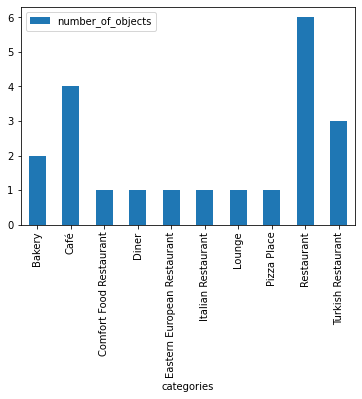

In [398]:
ax = df_categories.plot.bar()

<b>ADD VENUES TO MAP<b>

In [399]:
                       
for i in range(0,len(df_total_Restaurants)):
    
    folium.Marker([df_total_Restaurants.iloc[i]['lat'], df_total_Restaurants.iloc[i]['lng']], popup=df_total_Restaurants.iloc[i]['name'], icon=folium.Icon(color='lightgray')).add_to(map_Center)


NEIGHBORHOOD / AREA "KISELA VODA" ... THIS IS 6th AREA FOR ANALYSIS

In [400]:
df_Sk_area=pd.read_csv("SKOPJE LOKACII.csv")
#print(df_Sk_area)

print("latitude & longitude FOR NEIGHBORHOOD / AREA 'KISELA VODA' ARE:")

lat=df_Sk_area.iat[5, 1]
lng=df_Sk_area.iat[5, 2]
radius=df_Sk_area.iat[5, 4]

print("latitude is", lat)
print("longitude is", lng)
print("radius of interest is around:" , radius, "meters")

df_total_Restaurants=get_venues(lat,lng,radius)
df_total_Restaurants

latitude & longitude FOR NEIGHBORHOOD / AREA 'KISELA VODA' ARE:
latitude is 41.973007374689644
longitude is 21.443916283110106
radius of interest is around: 1750 meters


,name,lat,lng,categories
0,Get,41.972729,21.444987,Café
2,Face Caffe,41.973966,21.443536,Café
4,Канапе Кетеринг / Kanape Ketering,41.974182,21.445564,Restaurant
8,Kafe Bar Logo,41.976156,21.445150,Lounge
9,Equilibrium Restaurant & Coffee Bar,41.986579,21.454279,Modern European Restaurant
12,Pekara Kruna,41.983605,21.439019,Bakery
19,Block Cafe,41.987537,21.451182,Lounge
22,Gostilnica Fontana,41.986403,21.437001,BBQ Joint
23,Restoran Firma,41.983433,21.458360,Restaurant
24,"Пекара ""Кај курвите""",41.978476,21.442112,Bakery


In [401]:
df_categories= df_total_Restaurants.groupby(['categories']).count()
df_categories.drop(['lat','lng'], axis=1,inplace = True)
df_categories.rename(columns = {'name':'number_of_objects'}, inplace = True)
df_categories

,number_of_objects
categories,
BBQ Joint,1
Bakery,3
Café,2
Dessert Shop,1
Eastern European Restaurant,2
Lounge,3
Modern European Restaurant,1
Pizza Place,2
Restaurant,2


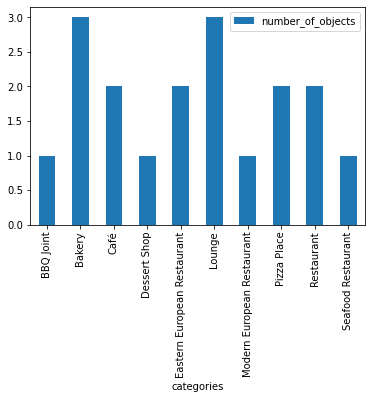

In [402]:
ax = df_categories.plot.bar()

ADD VENUES TO MAP

In [408]:
                       
for i in range(0,len(df_total_Restaurants)):
    
    folium.Marker([df_total_Restaurants.iloc[i]['lat'], df_total_Restaurants.iloc[i]['lng']], popup=df_total_Restaurants.iloc[i]['name'], icon=folium.Icon(color='pink')).add_to(map_Center)


In [409]:
map_Center

  <b>IF YOU CAN NOT TO OPEN THE MAP DIRECTLY IN THIS NOTEBOOK, PLEASE SEE YOU A LOAD FILE map_Center AND CAN BE OPEN WITH CHROME BROWSER<b>

In [405]:
map_Center.save("map_Center.html")